<h1><b>Amazon Products Recommendation System</b></h1>

60f591cef9c2cb840d6d7d96_recommended-thomas.png

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h2><b>1. Introduction</b></h2>

*   In this notebook, we aim to tackle the real-world problem of building a recommendation system for Amazon products. Recommendation systems play a crucial role in e-commerce platforms like Amazon by helping users discover products that they might be interested in based on their preferences and behavior. In this project, we'll explore various techniques and algorithms to develop a recommendation system that provides personalized and relevant product recommendations to Amazon users.

<p style='font-size:18px'><b> Problem Statemtent </b></p>
Suggest the Product based on the Clicked Product that was there in the Amazon Shopping Site.

In [ ]:
#Import Required Module/Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import gc
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import requests
import matplotlib.image as mpimg
from PIL import Image
from io import BytesIO
from sklearn.feature_extraction.text import CountVectorizer

from collections import Counter
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.decomposition import TruncatedSVD

from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy import spatial

from sent2vec.vectorizer import Vectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from keras.models import Model
from efficientnet.keras import EfficientNetB1
from keras.applications.efficientnet import preprocess_input
from keras.layers import GlobalAveragePooling2D

In [ ]:
pip install sent2vec

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
pip install efficientnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.5 MB/s eta 0:00:00


<h2><b>2. About the Dataset</b></h2>

<h4><b>Download the dataset from kaggle:- </b></h4> <a>https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset</a>

***main_category:***

This column represents the main category or department to which the product belongs.
Examples of main categories include electronics, clothing, home decor, books, etc.

***sub_category:***

This column provides additional categorization within the main category.
For example, within the electronics category, sub-categories could include smartphones, laptops, headphones, etc.

***image:***

The image column contains URLs or file paths to images of the products.
These images are typically used for visual representation of the products on the e-commerce platform.

***link:***

The link column contains URLs to the product pages on the e-commerce website.
Users can click on these links to view detailed information about the products and make purchases.

***ratings:***

This column contains the average rating of the product, typically on a scale of 1 to 5.
Ratings are provided by users who have purchased or interacted with the product and are used to measure customer satisfaction.

***no_of_ratings:***

The no_of_ratings column represents the total number of ratings or reviews received by the product.
It indicates the level of engagement and popularity of the product among users.

***discount_price:***

This column contains the discounted price of the product, if applicable.
Discounts are often offered by e-commerce platforms to attract customers and increase sales.

***actual_price:***

The actual_price column contains the original or list price of the product before any discounts.
It provides users with information about the product's original value and helps them assess the savings offered by discounts.

<h2><b> 3. Approaches for Feature Engineering</b></h2>

***image_vec:***

Use techniques such as image embedding or convolutional neural networks (CNNs) to extract features from product images.
Apply pre-trained image models such as **EfficientNetB1** to extract high-level features from images.
Use dimensionality reduction techniques (e.g., PCA) to reduce the dimensionality of image features while retaining important information.
Normalize image features to ensure consistency and improve model performance.

***name_vec:***

Use techniques such as word embedding such as **Sent2Vec** to convert product names into dense vector representations.

***name_bow:***

Convert product names into a Bag-of-Words (BoW) representation, where each word in the name is represented as a feature with its frequency count.
Use TF-IDF (Term Frequency-Inverse Document Frequency) to weigh the importance of words in product names based on their frequency in the dataset.
Here the dimension is 5000, because the 4729 dimensions covers 94% of the variance Information.

***discounted_percentage:***

Calculate the discounted percentage by subtracting the discounted price from the actual price and dividing by the actual price.
Normalize the discounted percentage to ensure consistency and scale it to a standard range (e.g., between 0 and 1).

***discounted_price_norm:***

Normalize the discounted price to ensure consistency and scale it to a standard range (e.g., between 0 and 1).
Use techniques such as min-max scaling or z-score normalization to scale the discounted prices based on the distribution of values in the dataset.

***ratings_norm:***

Normalize the ratings to ensure consistency and scale them to a standard range (e.g., between 0 and 1).
Use techniques such as min-max scaling or z-score normalization to scale the ratings based on the distribution of values in the dataset.

***image_vec_norm:***

Normalize the image features extracted using techniques like min-max scaling or z-score normalization.
Ensure that image features are scaled to a standard range to improve model performance and consistency.










In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AmazonProductRecommendationSystem/Datasets/All_Electronics.csv')
df.head()

name        main_category  \
0  Redmi 10 Power (Power Black, 8GB RAM, 128GB St...  tv, audio & cameras   
1  OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...  tv, audio & cameras   
2  OnePlus Bullets Z2 Bluetooth Wireless in Ear E...  tv, audio & cameras   
3  Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...  tv, audio & cameras   
4  OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...  tv, audio & cameras   

      sub_category                                              image  \
0  All Electronics  https://m.media-amazon.com/images/I/81eM15lVcJ...   
1  All Electronics  https://m.media-amazon.com/images/I/71AvQd3Vzq...   
2  All Electronics  https://m.media-amazon.com/images/I/51UhwaQXCp...   
3  All Electronics  https://m.media-amazon.com/images/I/81I3w4J6yj...   
4  All Electronics  https://m.media-amazon.com/images/I/71V--WZVUI...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Redmi-Power-Black-128GB-...     4.0           965   
1  https://www.amazon.in/OnePlus-Nord-Lite-128GB-...     4.3       113,956   
2  https://www.amazon.in/Oneplus-Bluetooth-Wirele...     4.2        90,304   
3  https://www.amazon.in/Samsung-Mystique-Storage...     4.1        24,863   
4  https://www.amazon.in/OnePlus-Nord-Black-128GB...     4.3       113,956   

  discount_price actual_price  
0        ₹10,999      ₹18,999  
1        ₹18,999      ₹19,999  
2         ₹1,999       ₹2,299  
3        ₹15,999      ₹24,999  
4        ₹18,999      ₹19,999

<h2><b>4. Exploratory Data Analysis (EDA):</b></h2>

In [ ]:
print(f"The no of unique value in Name Column is:- {len(df['name'].unique())}")

The no of unique value in Name Column is:- 8800


In [ ]:
df['sub_category'].unique()

array(['All Electronics'], dtype=object)

In [ ]:
print(f"The Shape of the Dataset is:- {df.shape}")
print(df.isnull().sum())
print(f"Column Names:- {df.columns}")

The Shape of the Dataset is:- (9600, 9)
name                0
main_category       0
sub_category        0
image               0
link                0
ratings            95
no_of_ratings      95
discount_price    484
actual_price       70
dtype: int64
Column Names:- Index(['name', 'main_category', 'sub_category', 'image', 'link', 'ratings',
       'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')


In [ ]:
df.describe().T

count unique  \
name            9600   8800   
main_category   9600      1   
sub_category    9600      1   
image           9600   9321   
link            9600   9600   
ratings         9505     39   
no_of_ratings   9505   3455   
discount_price  9116   1608   
actual_price    9530   1068   

                                                              top  freq  
name            TAGG Verve Sense Smartwatch with 1.70'' Large ...     9  
main_category                                 tv, audio & cameras  9600  
sub_category                                      All Electronics  9600  
image           https://m.media-amazon.com/images/I/61ARj+szfW...     7  
link            https://www.amazon.in/Redmi-Power-Black-128GB-...     1  
ratings                                                       4.3  1310  
no_of_ratings                                                   1    51  
discount_price                                               ₹299   481  
actual_price                                                 ₹999  1540

In [ ]:
# Remove Null ActualPrice value Columns from dataset

df = df.loc[~df['actual_price'].isnull()]
print(f"After Removing null values in Actual Price Column, The Final Shape is: {df.shape[0]}")

After Removing null values in Actual Price Column, The Final Shape is: 9530


In [ ]:
#Fill 0.0 for all NaN or Null Values

df['ratings'] = df['ratings'].fillna(0.0)
df['no_of_ratings'] = df['no_of_ratings'].fillna(0)

df['discount_price'] = df['discount_price'].str.replace('₹', '')
df['discount_price'] = df['discount_price'].fillna(0.0)

df['actual_price'] = df['actual_price'].str.replace('₹', '')
df['actual_price'] = df['actual_price'].fillna(0.0)

df.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [ ]:
#See top 10 Most Common Actual Price by Actual Price Column
price_count = Counter(list(df['actual_price']))
price_count.most_common(10)

[('999', 1540),
 ('1,999', 506),
 ('1,499', 298),
 ('499', 296),
 ('599', 281),
 ('2,999', 258),
 ('799', 227),
 ('699', 199),
 ('2,499', 190),
 ('399', 164)]

In [ ]:
#See top 10 Most Common Name by Name Column
name_count = Counter(list(df['name']))
name_count.most_common(10)

[("TAGG Verve Sense Smartwatch with 1.70'' Large Display, Real SPO2, and Real-Time Heart Rate Tracking, 7 Days Battery Backu...",
  9),
 ('Yogi MART Foldable Wooden Laptop Bed Tray Table, Multifunction Lap Tablet Desk with Cup Holder, Perfect for Eating Breakfa...',
  7),
 ('Miracase Upgrade Cover for Airpods Pro 2 2022 Launch Case, Triple Layer Protective Liquid Silicone Case for AirPods Pro 2n...',
  7),
 ('Fire-Boltt Visionary 1.78" AMOLED Bluetooth Calling Smartwatch with 368 * 448 Pixel Resolution, Rotating Crown & 60Hz Refr...',
  6),
 ('Tarkan Portable Folding Laptop Desk for Bed, Lapdesk with Handle, Drawer, Cup & Mobile/Tablet Holder for Study, Eating, Wo...',
  6),
 ('Logitech Pebble Wireless Mouse with Bluetooth or 2.4 GHz Receiver, Silent, Slim Computer Mouse with Quiet Clicks, for Lapt...',
  6),
 ('Fire-Boltt Eterno 1.99" Largest Display, Bluetooth Calling Smartwatch with 1184mm Display Area, AI Voice Assistant, 120+ S...',
  6),
 ('Palazzo Foldable Wooden Laptop Bed Tray

In [ ]:
print(f"The Total duplicates in Name is:- {df['name'].duplicated().sum()}")

The Total duplicates in Name is:- 797


<h2><b>5. Data Preprocessing & Feature Engineering</b></h2>

In [ ]:
# Select duplicated rows based on the 'name' column
duplicated_rows = df[df.duplicated(subset='name', keep=False)]

# Sort the duplicated rows by the 'name' column
sorted_duplicated_rows = duplicated_rows.sort_values(by='name')

print(sorted_duplicated_rows['name'])

5933    (Renewed) Fire-Boltt Gladiator 1.96" Biggest D...
7548    (Renewed) Fire-Boltt Gladiator 1.96" Biggest D...
6600    (Renewed) Fire-Boltt Ninja Call Pro Plus 1.83"...
6599    (Renewed) Fire-Boltt Ninja Call Pro Plus 1.83"...
3328    (Renewed) Fire-Boltt Ninja Call Pro Plus Bluet...
                              ...                        
3983    truke Buds PRO Hybrid Active Noise Cancelling ...
2483    truke Buds Q1 Bluetooth Truly Wireless in Ear ...
7361    truke Buds Q1 Bluetooth Truly Wireless in Ear ...
754     truke Newly Launched Buds A1 True Wireless Ear...
1209    truke Newly Launched Buds A1 True Wireless Ear...
Name: name, Length: 1371, dtype: object


In [ ]:
#Remove all the duplicates by keeping first/original name
df.drop_duplicates(subset='name', keep='first', inplace=True)
print(f"After Removing all the duplicates, The Final Shape is: {df.shape[0]}")

After Removing all the duplicates, The Final Shape is: 8733


In [ ]:
#Remove unnecessary column i.e. sub_category and main_category
df.drop(['main_category','sub_category'], axis=1, inplace=True)
df.head()

name  \
0  Redmi 10 Power (Power Black, 8GB RAM, 128GB St...   
1  OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...   
2  OnePlus Bullets Z2 Bluetooth Wireless in Ear E...   
3  Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...   
4  OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...   

                                               image  \
0  https://m.media-amazon.com/images/I/81eM15lVcJ...   
1  https://m.media-amazon.com/images/I/71AvQd3Vzq...   
2  https://m.media-amazon.com/images/I/51UhwaQXCp...   
3  https://m.media-amazon.com/images/I/81I3w4J6yj...   
4  https://m.media-amazon.com/images/I/71V--WZVUI...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Redmi-Power-Black-128GB-...     4.0           965   
1  https://www.amazon.in/OnePlus-Nord-Lite-128GB-...     4.3       113,956   
2  https://www.amazon.in/Oneplus-Bluetooth-Wirele...     4.2        90,304   
3  https://www.amazon.in/Samsung-Mystique-Storage...     4.1        24,863   
4  https://www.amazon.in/OnePlus-Nord-Black-128GB...     4.3       113,956   

  discount_price actual_price  
0         10,999       18,999  
1         18,999       19,999  
2          1,999        2,299  
3         15,999       24,999  
4         18,999       19,999

In [ ]:
# Remove commas from actual_price and discount_price columns
df['actual_price'] = df['actual_price'].str.replace(',', '')
df['discount_price'] = df['discount_price'].str.replace(',', '')

# Convert columns to numeric data type
df['actual_price'] = pd.to_numeric(df['actual_price'])
df['discount_price'] = pd.to_numeric(df['discount_price'])

# Calculate total price
df['discount_percentage'] = round((df['actual_price'] - df['discount_price'])/df['actual_price'], 3)

df.head()

name  \
0  Redmi 10 Power (Power Black, 8GB RAM, 128GB St...   
1  OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...   
2  OnePlus Bullets Z2 Bluetooth Wireless in Ear E...   
3  Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...   
4  OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...   

                                               image  \
0  https://m.media-amazon.com/images/I/81eM15lVcJ...   
1  https://m.media-amazon.com/images/I/71AvQd3Vzq...   
2  https://m.media-amazon.com/images/I/51UhwaQXCp...   
3  https://m.media-amazon.com/images/I/81I3w4J6yj...   
4  https://m.media-amazon.com/images/I/71V--WZVUI...   

                                                link ratings no_of_ratings  \
0  https://www.amazon.in/Redmi-Power-Black-128GB-...     4.0           965   
1  https://www.amazon.in/OnePlus-Nord-Lite-128GB-...     4.3       113,956   
2  https://www.amazon.in/Oneplus-Bluetooth-Wirele...     4.2        90,304   
3  https://www.amazon.in/Samsung-Mystique-Storage...     4.1        24,863   
4  https://www.amazon.in/OnePlus-Nord-Black-128GB...     4.3       113,956   

   discount_price  actual_price  discount_percentage  
0         10999.0       18999.0                0.421  
1         18999.0       19999.0                0.050  
2          1999.0        2299.0                0.130  
3         15999.0       24999.0                0.360  
4         18999.0       19999.0                0.050

In [ ]:
# Remove commas and replace "FREE Delivery by Amazon" with 0 in 'no_of_ratings' column
df['no_of_ratings'] = df['no_of_ratings'].str.replace(',', '').replace('FREE Delivery by Amazon', '0')
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'], errors='coerce')

# Replace 'Get' with 0 in 'ratings' column
df['ratings'] = df['ratings'].str.replace('Get', '0.0')
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

df['ratings'] = df['ratings'].replace(0.0, df['ratings'].mean())

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

df['ratings_norm'] = scaler.fit_transform(df['ratings'].values.reshape(-1, 1))
df['discount_price_norm'] = scaler.fit_transform(df['discount_price'].values.reshape(-1, 1))

In [ ]:
#Function for correcting of Link of Images
def ImageLinkConstructor(url):
    try:
        if "W/IMAGERENDERING" in url:
            start_index = url.find("es/") + 2 # Adjusted start index
            end_index = url.find("/I/")  # Adjusted end index

            # If both start and end indices are found, remove the substring dynamically
            if start_index != -1 and end_index != -1:
                url = url[:start_index] + url[end_index:]
                return url
        else:
            return url
    except Exception as e:
        print("An error occurred:", e)
        return None

In [ ]:
df['image'] = df['image'].apply(ImageLinkConstructor)

In [ ]:
df.isnull().sum()

name                     0
image                    0
link                     0
ratings                 90
no_of_ratings           90
discount_price         399
actual_price             0
discount_percentage    399
ratings_norm            90
discount_price_norm    399
dtype: int64

In [ ]:
#Fill 0.0 for all NaN or Null Values
df['ratings'] = df['ratings'].fillna(0.0)
df['no_of_ratings'] = df['no_of_ratings'].fillna(0.0)

df['discount_price'] = df['discount_price'].fillna(0.0)
df['discount_percentage'] = df['discount_percentage'].fillna(0.0)

df['ratings_norm'] = df['ratings_norm'].fillna(0.0)
df['discount_price_norm'] = df['discount_price_norm'].fillna(0.0)

In [ ]:
df.isnull().sum()

name                   0
image                  0
link                   0
ratings                0
no_of_ratings          0
discount_price         0
actual_price           0
discount_percentage    0
ratings_norm           0
discount_price_norm    0
dtype: int64

In [ ]:
# Save DataFrame to CSV
#df.to_csv('/content/drive/MyDrive/Datasets/amazon_electronics_data_processed(1).csv', index=False)

**Process for Name Column to BagofWord Vector**

In [ ]:
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2))

In [ ]:
name_list = df['name'].values.tolist()
bow_matrix = vectorizer.fit_transform(name_list)

In [ ]:
bow_matrix.shape

(8733, 61212)

In [ ]:
# dense_bow_matrix = bow_matrix.toarray()
# dense_bow_matrix.shape

(8733, 61212)

In [ ]:
# Create TruncatedSVD instance
svd = TruncatedSVD(n_components=5000)

# Fit TruncatedSVD to the sparse bag-of-words matrix
svd.fit(bow_matrix)

# Get the explained variance ratio from the SVD model
explained_variance_ratio = svd.explained_variance_ratio_

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Find the index where the cumulative explained variance exceeds 90%
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

print("Number of components for 90% explained variance:", n_components_90)

Number of components for 90% explained variance: 3721


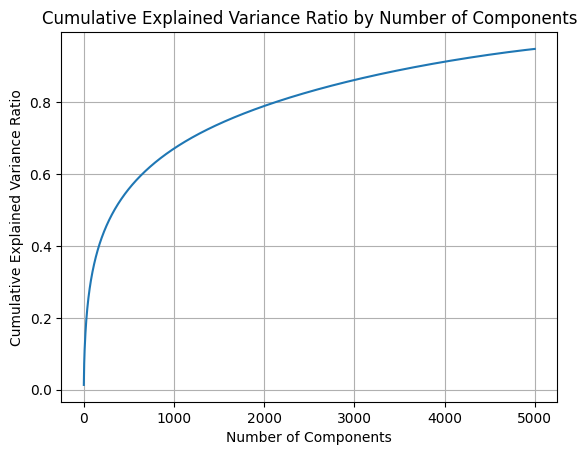

Number of components for 90% explained variance: 3721
Number of components for 94% explained variance: 4729


In [ ]:
# Plot cumulative explained variance ratio
plt.plot(cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Number of Components')
plt.grid(True)
plt.show()

# Find the number of components that cover 90-95% of the variance
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_94 = np.argmax(cumulative_variance >= 0.94) + 1

print("Number of components for 90% explained variance:", n_components_90)
print("Number of components for 94% explained variance:", n_components_94)

In [ ]:
# # Define the chunk size
# chunk_size = 2500

# ipca = IncrementalPCA(n_components=2500)

# # Iterate over the data in chunks to estimate the number of components
# for chunk_start in range(0, len(dense_bow_matrix), chunk_size):
#     chunk_end = min(chunk_start + chunk_size, len(dense_bow_matrix))
#     chunk = dense_bow_matrix[chunk_start:chunk_end]

#     # Fit the chunk to IncrementalPCA
#     ipca.partial_fit(chunk)
#     print(f"Done-{chunk_start}")
#     gc.collect()

Done-0
Done-2000
Done-4000
Done-6000
Done-8000


In [ ]:
# Transform the data
bow_matrix_transformed = svd.transform(bow_matrix)

In [ ]:
bow_matrix_transformed.shape

(8733, 5000)

In [ ]:
#Convert Image Vector data to Pandas Series
name_bow__series = pd.Series(bow_matrix_transformed.tolist(), name='name_bow')

In [ ]:
# Add a new column "image_vec" in dataset and add "image_vec_series" into it
df['name_bow'] = name_bow__series

In [ ]:
df

name  \
0     Redmi 10 Power (Power Black, 8GB RAM, 128GB St...   
1     OnePlus Nord CE 2 Lite 5G (Blue Tide, 6GB RAM,...   
2     OnePlus Bullets Z2 Bluetooth Wireless in Ear E...   
3     Samsung Galaxy M33 5G (Mystique Green, 6GB, 12...   
4     OnePlus Nord CE 2 Lite 5G (Black Dusk, 6GB RAM...   
...                                                 ...   
8728  WOW IMAGINE Shockproof Crystal Clear Back Case...   
8729  PALAY® BTS Backpack For Boys Kpop BTS Bangtan ...   
8730  ZEBRONICS Zeb-Sound Bomb 5 TWS V5.0 Bluetooth ...   
8731  LINQS® Original NXP Chip | Waterproof NFC Tag ...   
8732  Pragati Systems® Medium Grain 24x36 Inch 10 Oz...   

                                                  image  \
0     https://m.media-amazon.com/images/I/81eM15lVcJ...   
1     https://m.media-amazon.com/images/I/71AvQd3Vzq...   
2     https://m.media-amazon.com/images/I/51UhwaQXCp...   
3     https://m.media-amazon.com/images/I/81I3w4J6yj...   
4     https://m.media-amazon.com/images/I/71V--WZVUI...   
...                                                 ...   
8728  https://m.media-amazon.com/images/I/51eUYcrmvh...   
8729  https://m.media-amazon.com/images/I/51WpV43F1M...   
8730  https://m.media-amazon.com/images/I/61O7fCXFip...   
8731  https://m.media-amazon.com/images/I/71Sg1Qsf+4...   
8732  https://m.media-amazon.com/images/I/81ozRRztsz...   

                                                   link  ratings  \
0     https://www.amazon.in/Redmi-Power-Black-128GB-...      4.0   
1     https://www.amazon.in/OnePlus-Nord-Lite-128GB-...      4.3   
2     https://www.amazon.in/Oneplus-Bluetooth-Wirele...      4.2   
3     https://www.amazon.in/Samsung-Mystique-Storage...      4.1   
4     https://www.amazon.in/OnePlus-Nord-Black-128GB...      4.3   
...                                                 ...      ...   
8728  https://www.amazon.in/WOW-IMAGINE-Polycarbonat...      4.2   
8729  https://www.amazon.in/PALAY%C2%AE-Backpack-Ban...      4.1   
8730  https://www.amazon.in/Zebronics-Zeb-Sound-Blue...      3.5   
8731  https://www.amazon.in/LINQS-Sticker-Smartrac-C...      3.6   
8732  https://www.amazon.in/Pragati-Systems-Stretche...      4.5   

      no_of_ratings  discount_price  actual_price  discount_percentage  \
0             965.0         10999.0       18999.0                0.421   
1          113956.0         18999.0       19999.0                0.050   
2           90304.0          1999.0        2299.0                0.130   
3           24863.0         15999.0       24999.0                0.360   
4          113956.0         18999.0       19999.0                0.050   
...             ...             ...           ...                  ...   
8728           34.0           189.0         999.0                0.811   
8729           37.0          1710.0        2491.0                0.314   
8730         3177.0           962.0        3999.0                0.759   
8731          210.0           400.0        1000.0                0.600   
8732          938.0           940.0        1120.0                0.161   

      ratings_norm  discount_price_norm  \
0            0.750             0.081407   
1            0.825             0.140671   
2            0.800             0.014735   
3            0.775             0.118447   
4            0.825             0.140671   
...            ...                  ...   
8728         0.800             0.001326   
8729         0.775             0.012594   
8730         0.625             0.007052   
8731         0.650             0.002889   
8732         0.875             0.006889   

                                              image_vec  \
0     [761.9555053710938, -0.0, 4865.36328125, 938.8...   
1     [8572.48046875, -0.0, 526.4951171875, 18776.22...   
2     [12.728979110717773, -0.0, 51.45724105834961, ...   
3     [130.2864227294922, -0.0, 5938.41015625, -0.0,...   
4     [52.94151306152344, -0.0, 1286.3028564453125, ...   
...                                                 ... 

***Process for Image_vec Normalization***

In [ ]:
# Calculate the total minimum and maximum values across all points in 'image_vec'
total_min = df['image_vec'].apply(lambda x: np.min(x)).min()
total_max = df['image_vec'].apply(lambda x: np.max(x)).max()

In [ ]:
# Normalize each point in 'image_vec' to the range [0, 1]
df['image_vec_norm'] = df['image_vec'].apply(lambda x: [(val - total_min) / (total_max - total_min) for val in x])

***Process for Image to Vector***

In [ ]:
#ReShape/Resized the unshaped image and Function for Url to Image
def url_to_image(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  img = img.resize((240, 240))  # Resize image to match input shape of EfficientNetB1

  # Preprocess the image
  img_array = np.array(img)
  print(img_array.shape)
  if len(img_array.shape) == 2:
    img_array = np.repeat(img_array[:, :, np.newaxis], 3, axis=2)
  print(f"{img_array.shape}")
  return img_array.reshape(240,240,3)

In [ ]:
#Convert image data to List
im_url_list = df['image'].values.tolist()

In [ ]:
#Chcek the shape of the all image, convert from url ti image and append it into im_mmatrix List
im_matrix =[]
for i in range(len(im_url_list)):
  # print(im_url_list[i])
  im1 = url_to_image(im_url_list[i])
  # print(im1.shape)
  im_matrix.append(im1)

In [ ]:
#Convert im_matrix List to numpy array
im_matrix = np.array(im_matrix)
im_matrix.shape

(8733, 240, 240, 3)

In [ ]:
#Call the EfficientNetB1 Pretrained Model
base_model = EfficientNetB1(weights='imagenet', include_top=False)

# Add Global Average Pooling layer
global_avg_pooling = GlobalAveragePooling2D()(base_model.output)

# Create the model
model = Model(inputs=base_model.input, outputs=global_avg_pooling)

27164032/27164032 [==============================] - 0s 0us/step


In [ ]:
#Convert Image to Vector
features = model.predict(im_matrix)

273/273 [==============================] - 27s 77ms/step


In [ ]:
print(f"The Shape of this Feature is: {features.shape}")

The Shape of this Feature is: (8733, 1280)


In [ ]:
#Convert Image Vector data to Pandas Series
image_vec_series = pd.Series(features.tolist(), name='image_vec')

In [ ]:
# Add a new column "image_vec" in dataset and add "image_vec_series" into it
df['image_vec'] = image_vec_series

In [ ]:
df['image_vec'].isnull().sum()

786

We get 786 Null value in Image_vec Column because the images are not in proper shape of (240,240,3); Means they are grayscale pictures.

We need to expand their dimensions and scale this (0 to 1) and apply the model again

In [ ]:
unshaped_im_url_list = df['image'][df['image_vec'].isnull()]

In [ ]:
unshaped_im_matrix =[]
for url in unshaped_im_url_list:
  im1 = url_to_image(url)
  unshaped_im_matrix.append(im1)

(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 

In [ ]:
# Ensure 'im_matrix' is in the correct shape and normalized
im_matrices = [np.expand_dims(un_im_matrix, axis=0) / 255.0 for un_im_matrix in unshaped_im_matrix]  # Add batch dimension and normalize

In [ ]:
# Concatenate the list of image matrices along the batch axis
im_batch = np.concatenate(im_matrices, axis=0)

In [ ]:
# Predict using the model
predictions = model.predict(im_batch)

25/25 [==============================] - 109s 4s/step


In [ ]:
print(f"The Shape of this Feature is: {predictions.shape}")

The Shape of this Feature is: (786, 1280)


In [ ]:
#Convert Image Vector data to Pandas Series
un_image_vec_series = pd.Series(predictions.tolist(), name='image_vec')

In [ ]:
# Add a new column "image_vec" in dataset and add "image_vec_series" into it
df['image_vec'][df['image_vec'].isnull()].index

Index([7947, 7948, 7949, 7950, 7951, 7952, 7953, 7954, 7955, 7956,
       ...
       8723, 8724, 8725, 8726, 8727, 8728, 8729, 8730, 8731, 8732],
      dtype='int64', length=786)

In [ ]:
# Reset the index of image_vec_series to start from 7947
un_image_vec_series.index = range(7947, 7947 + len(un_image_vec_series))
un_image_vec_series.index

RangeIndex(start=7947, stop=8733, step=1)

In [ ]:
# Add the image_vec_series as a new column in df
df['image_vec'][df['image_vec'].isnull()] = un_image_vec_series

In [ ]:
df['image_vec'].isnull().sum()

0

***Process for Name(Sentence) to Vector***

In [ ]:
#convert to List
name_lists = df['name'].values.tolist()

In [ ]:
#Call the sent2vec module and implement name sentances in it
vectorizer = Vectorizer()
vectorizer.run(name_lists)
name_vector = vectorizer.vectors

In [ ]:
print(f"The shape of Name Vector is:- {len(name_vector[0])}")

In [ ]:
#Convert to Pandas Series
name_vec_series = pd.Series(name_vector, name='name_vec')

In [ ]:
#Add a new column "name_vec" and add "name_vec_series" data
df['name_vec'] = name_vec_series

***For Future Purposes Converting from String To List***
<br>
if u have saved as csv after doing all feature engg on original dataset, then it converts all the vectoe column as a string. So, to convert Str to List,run the code below.

**If not, then IGNORE**

In [ ]:
# def StrToList(data):
#   try:
#     # Replace multiple spaces with a single comma using a regular expression
#     modified_string = re.sub(r'\s+', ',', data)
#     return eval(modified_string)
#   except Exception as e:
#     print(modified_string)
#     modified_string = modified_string.replace(',', '', 1)
#     return eval(modified_string)

In [ ]:
# df['name_vec'] = df['name_vec'].apply(StrToList)

<h2><b>6. Recommendation Implentation (Testing)</b></h2>

**Add Image Showing feature for better visulization**



In [ ]:
# Assuming display_image_from_url is defined elsewhere
def display_image_from_url(image_url, max_size=(300, 300)):
    try:
        response = requests.get(image_url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    except Exception as e:
        print("Error displaying image:", e)

<h2><b>Using Single Feature</b></h2>

In [ ]:
def compute_similar_rows_single(data, columnName, index_no, num_similar, similarityMatrix):
    # Convert 'image_vec' lists to NumPy arrays
    image_vec_array = np.array(data[columnName].tolist())

    # Compute pairwise distances between the specified row and similar rows
    distances = pairwise_distances(np.array(data[columnName][index_no]).reshape(1, -1), image_vec_array, metric=similarityMatrix).flatten()

    # Sort distances and get indices of top similar products
    similar_indices = distances.argsort()[1:num_similar + 1]

    # Create DataFrame to store similarities
    similar_rows_df = pd.DataFrame(distances[similar_indices], columns=['Similarity'], index=similar_indices)

    # Display heatmap of similarities and main product image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(similar_rows_df, cmap="YlGnBu", annot=True, fmt=".3f")
    plt.title(f"Similarity to Index {index_no}")
    plt.xlabel("Index")
    plt.ylabel("Similar Index")

    plt.subplot(1, 2, 2)
    display_image_from_url(data['image'][index_no])
    plt.title(f"{data['name'][index_no]}")
    plt.axis('off')  # Turn off axis for the image

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.2)  # Adjust horizontal and vertical spacing between subplots
    plt.show()

    # Display images and titles of similar products
    for idx in similar_indices:
        plt.figure(figsize=(5, 5))  # Create a new figure for each similar product
        display_image_from_url(data['image'][idx])  # Display image of similar product
        plt.title(f"Index: {idx} - {data['name'][idx]}")  # Set title of similar product
        plt.axis('off')  # Turn off axis for the image
        plt.show()

***(Name) + EuclideanDistance***

In [ ]:
index_no = 1
num_similar = 10
columnName = 'name_vec'
similarityMatrix = 'euclidean'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

***(Name) + Cosine***

In [ ]:
index_no = 1
num_similar = 10
columnName = 'name_vec'
similarityMatrix = 'cosine'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

***(Image) + EuclideanDistance***

In [ ]:
index_no = 1
num_similar = 10
columnName = 'image_vec'
similarityMatrix = 'euclidean'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

***(Image) + Cosine***

In [ ]:
index_no = 1
num_similar = 10
columnName = 'image_vec'
similarityMatrix = 'cosine'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

***(Name_bow) + EuclideanDistance***

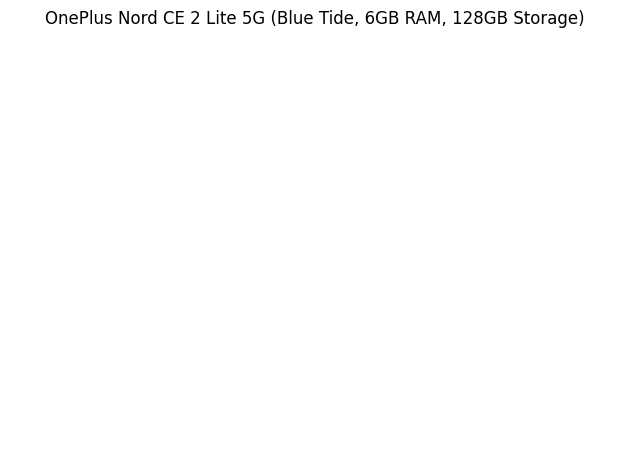

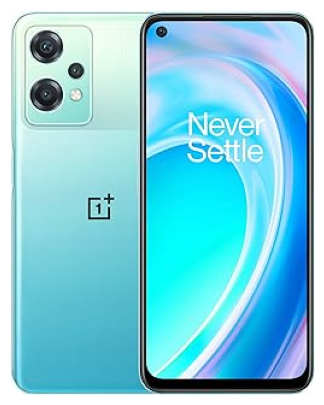

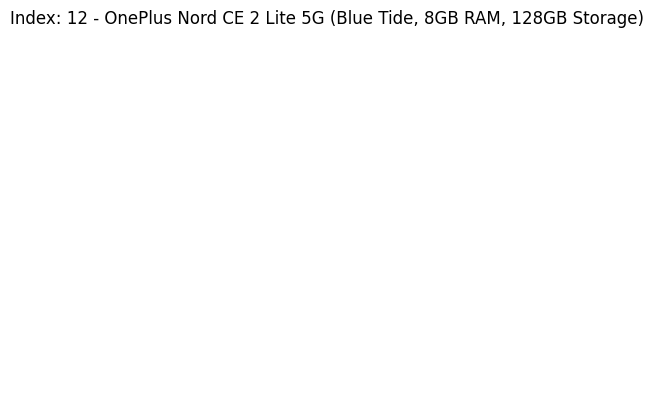

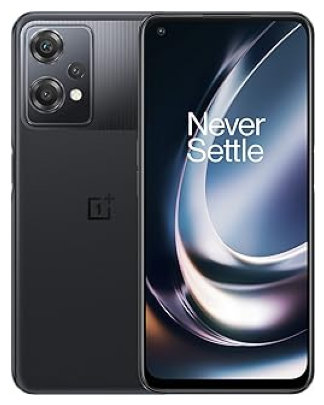

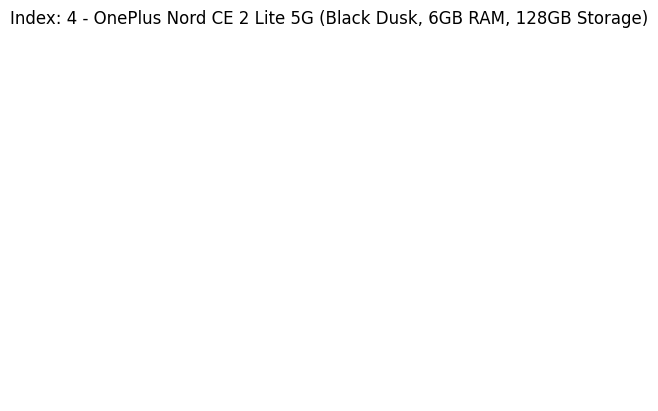

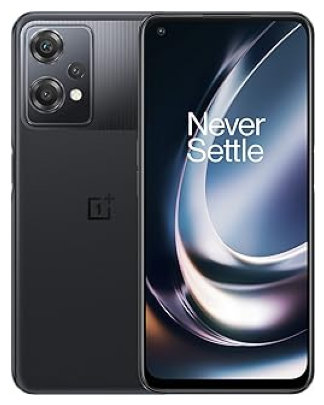

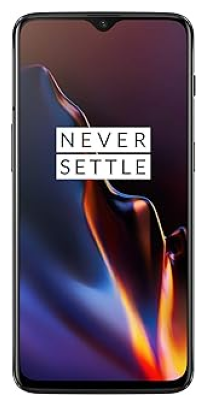

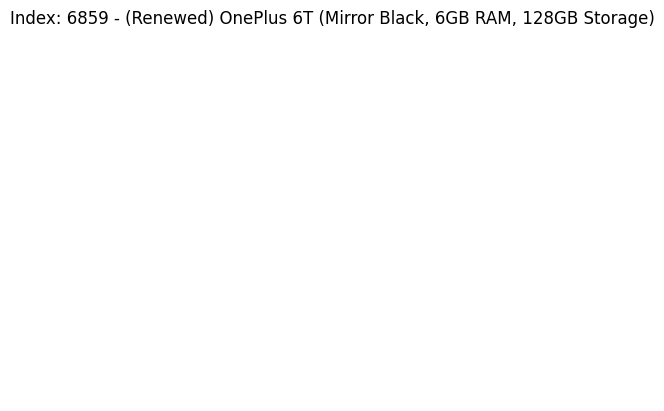

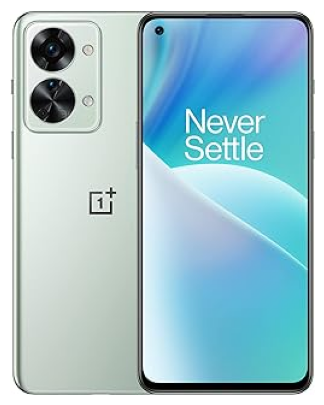

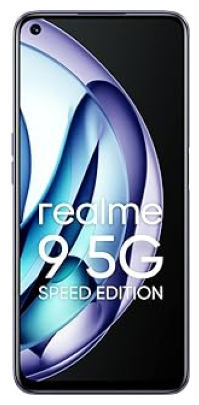

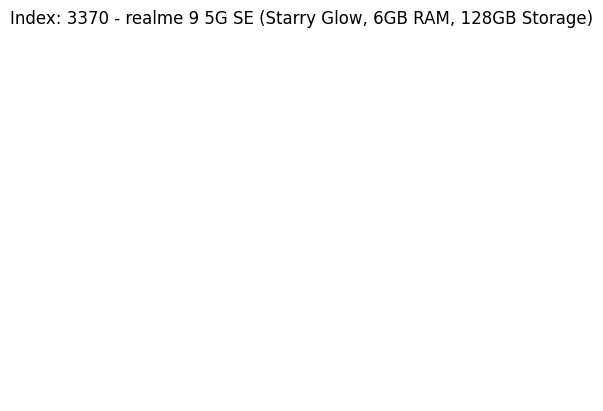

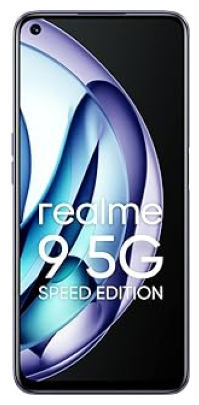

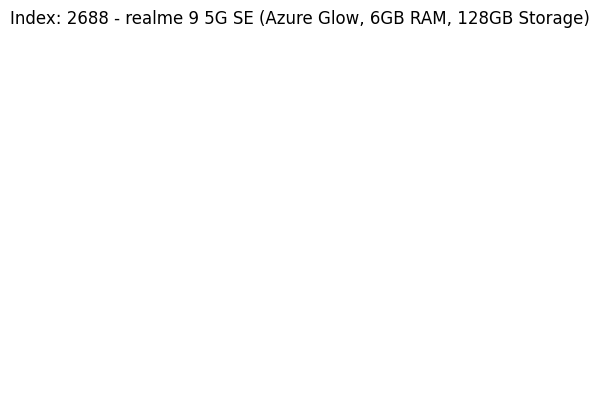

In [ ]:
index_no = 1
num_similar = 10
columnName = 'name_bow'
similarityMatrix = 'euclidean'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

***(Name_bow) + Cosine***

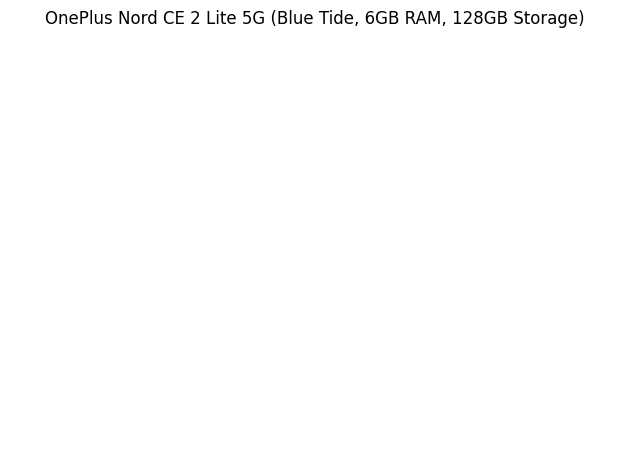

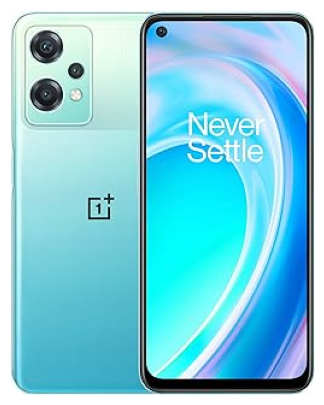

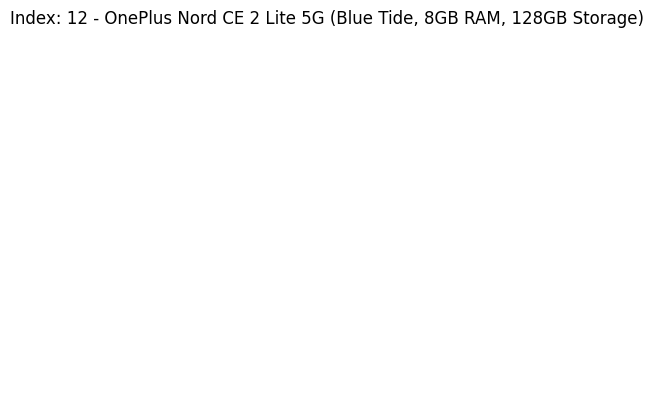

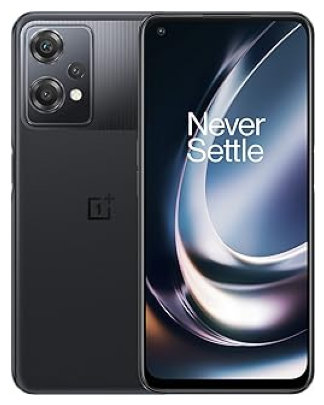

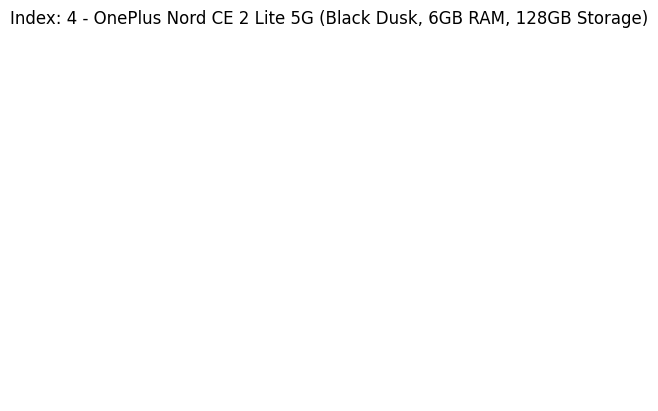

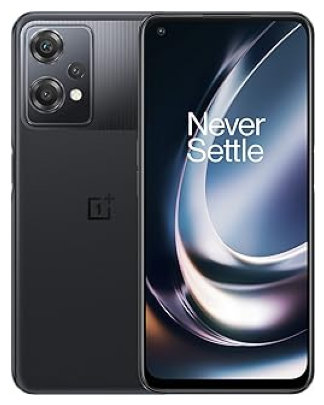

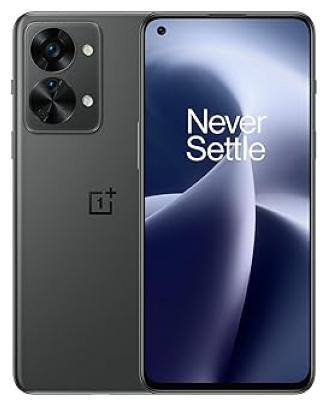

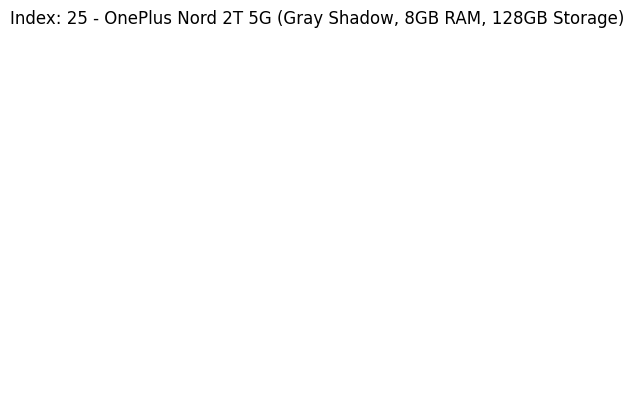

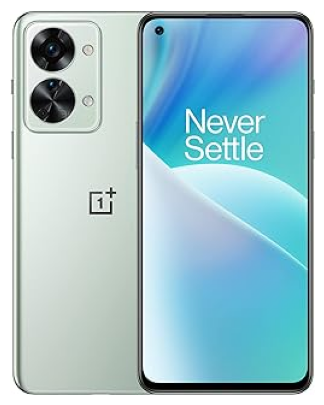

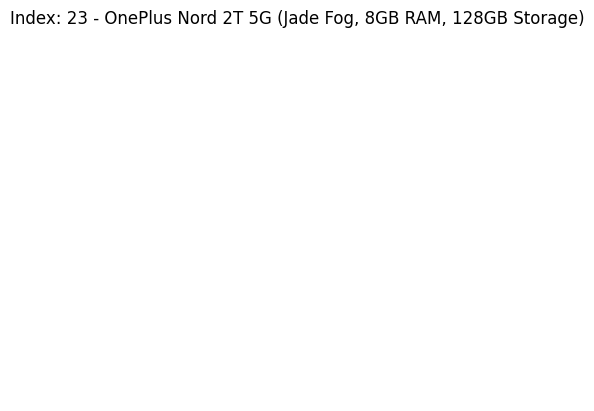

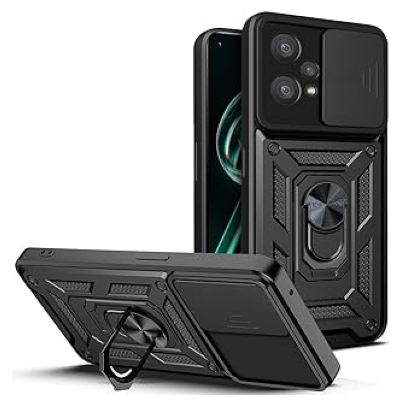

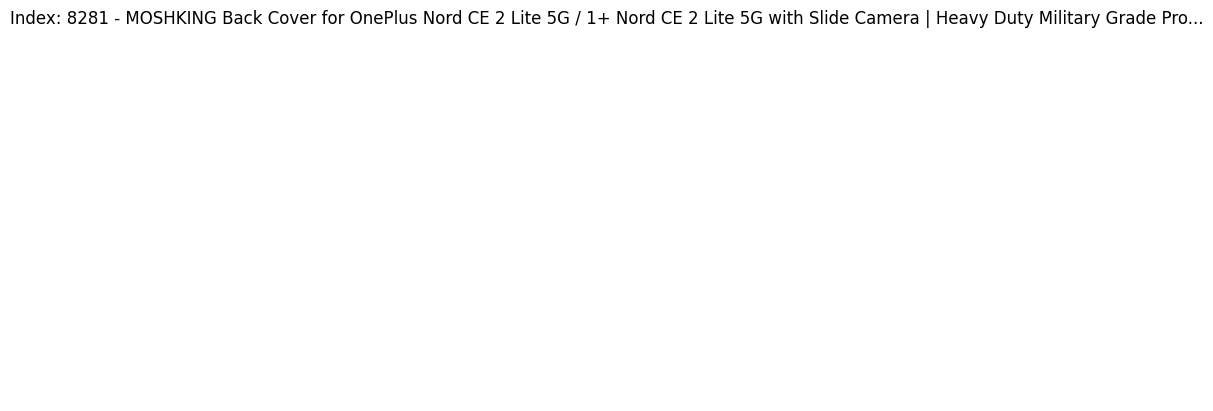

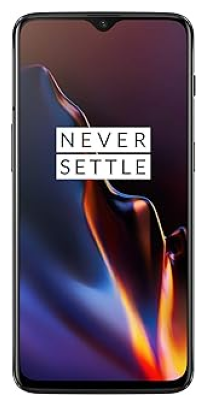

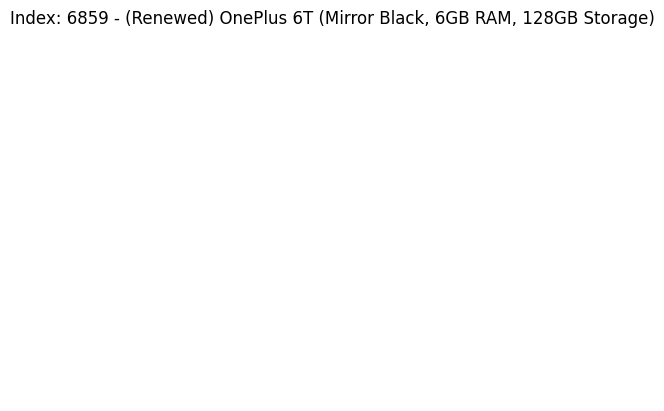

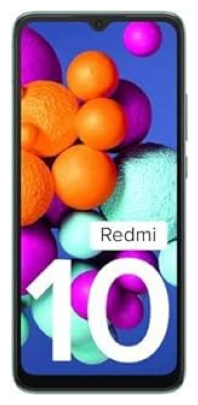

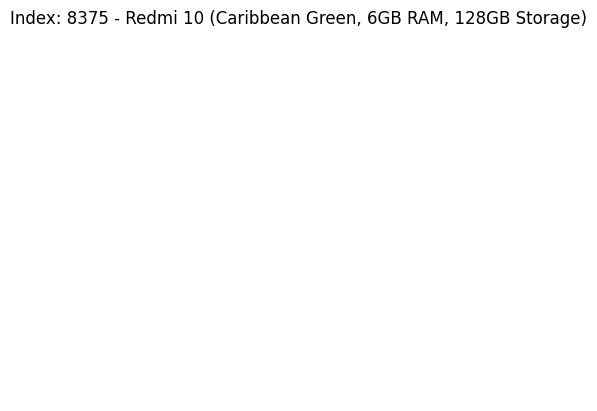

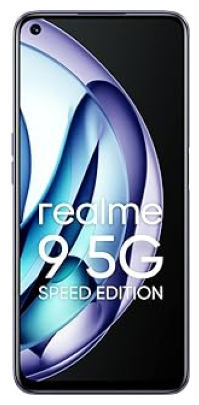

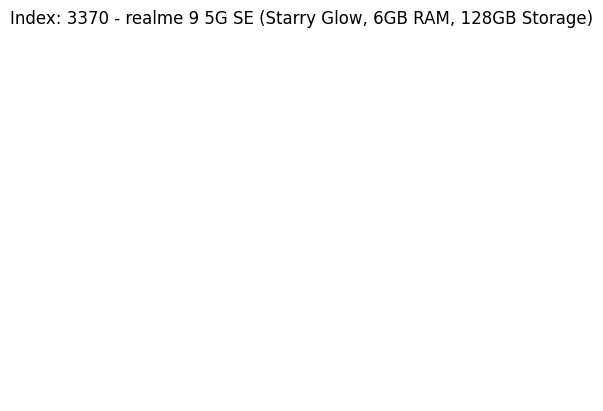

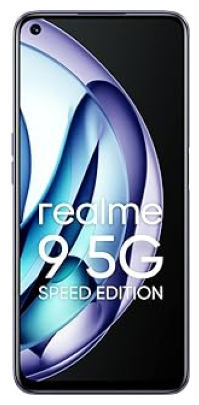

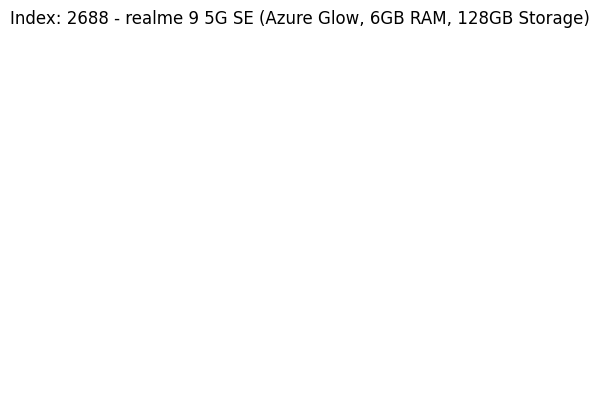

In [ ]:
index_no = 1
num_similar = 10
columnName = 'name_bow'
similarityMatrix = 'cosine'
compute_similar_rows_single(df, columnName, index_no, num_similar, similarityMatrix)

<h2><b>Using Multiple Features</b></h2>

In [ ]:
def compute_similar_rows_multiple(mainDataset, data, index_no, num_similar, similarityMatrix):
    # Compute pairwise distances between the specified row and similar rows
    distances = pairwise_distances(data[index_no].reshape(1, -1), data, metric=similarityMatrix).flatten()

    # Sort distances and get indices of top similar products
    similar_indices = distances.argsort()[1:num_similar + 1]

    # Create DataFrame to store similarities
    similar_rows_df = pd.DataFrame(distances[similar_indices], columns=['Similarity'], index=similar_indices)

     # Display heatmap of similarities and main product image
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(similar_rows_df, cmap="YlGnBu", annot=True, fmt=".3f")
    plt.title(f"Similarity to Index {index_no}")
    plt.xlabel("Index")
    plt.ylabel("Similar Index")

    plt.subplot(1, 2, 2)
    display_image_from_url(mainDataset['image'][index_no])
    plt.title(f"{mainDataset['name'][index_no]}")
    plt.axis('off')  # Turn off axis for the image

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.5, hspace=0.2)  # Adjust horizontal and vertical spacing between subplots
    plt.show()

    # Display images and titles of similar products
    for idx in similar_indices:
        plt.figure(figsize=(5, 5))  # Create a new figure for each similar product
        display_image_from_url(mainDataset['image'][idx])  # Display image of similar product
        plt.title(f"Index: {idx} - {mainDataset['name'][idx]}")  # Set title of similar product
        plt.axis('off')  # Turn off axis for the image
        plt.show()

***(Name + Image) + EuclideanDistance***

In [ ]:
# Concatenate df['name_vec'] and df['image_vec']
concatenated_img_name_data = np.hstack((np.array(df['name_vec'].tolist()), np.array(df['image_vec'].tolist())))
concatenated_img_name_data.shape

(2000, 2048)

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'euclidean'
compute_similar_rows_multiple(df, concatenated_img_name_data, index_no, num_similar, similarityParam)

***(Name + Image) + Cosine***

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'cosine'
compute_similar_rows_multiple(df, concatenated_img_name_data, index_no, num_similar, similarityParam)

***(Name_bow + Image_vec_norm) + EuclideanDistance***

In [ ]:
# Concatenate df['name_bow'] and df['image_vec_norm']
concatenated_img_name_bow_data = np.hstack((np.array(df['name_bow'].tolist()), np.array(df['image_vec_norm'].tolist())))
concatenated_img_name_bow_data.shape

(8733, 6280)

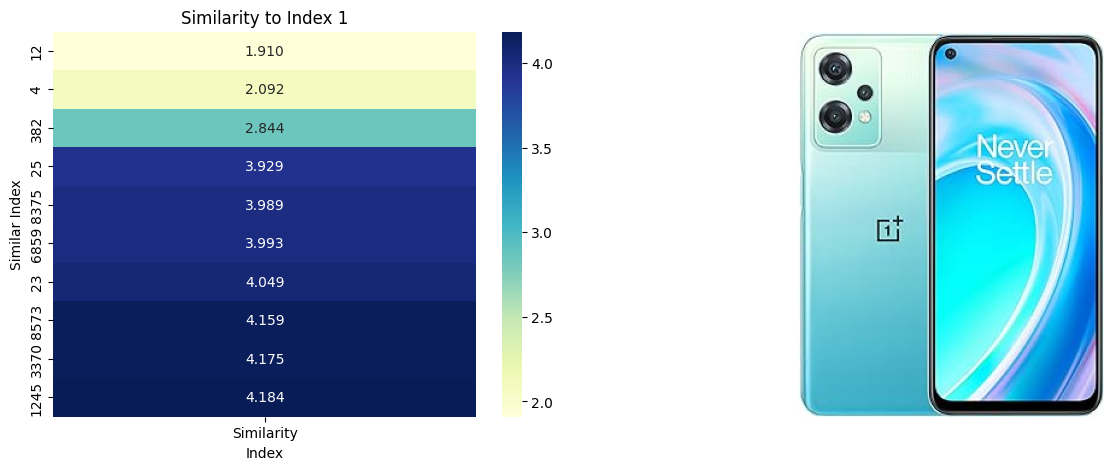

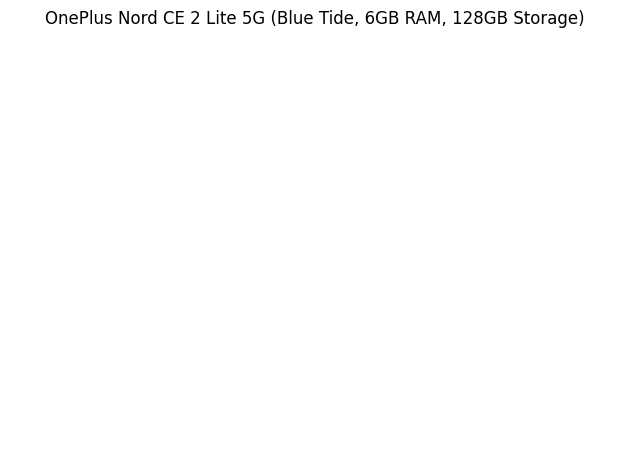

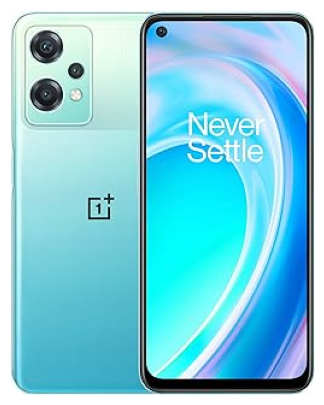

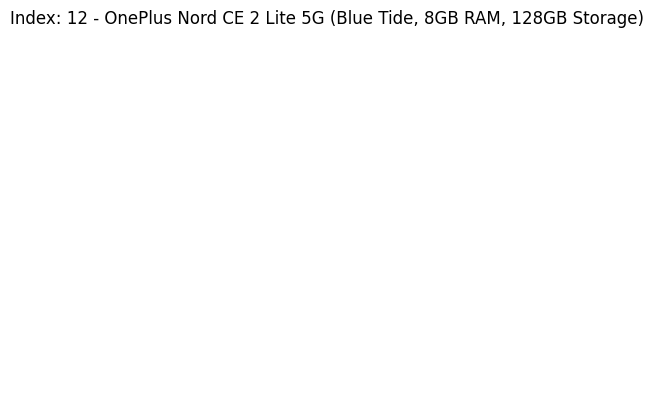

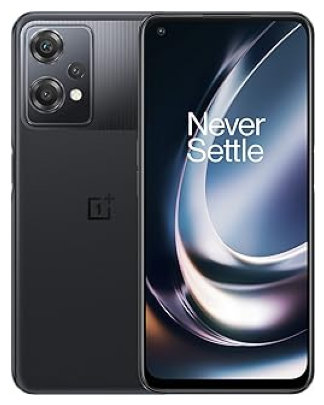

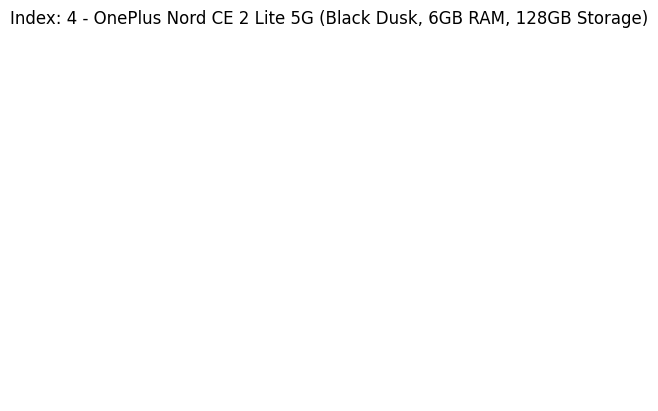

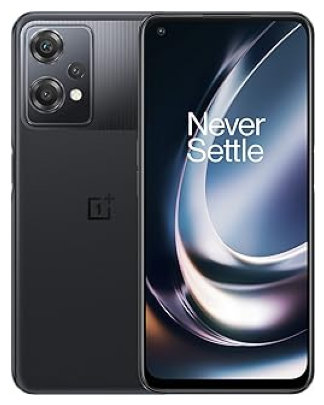

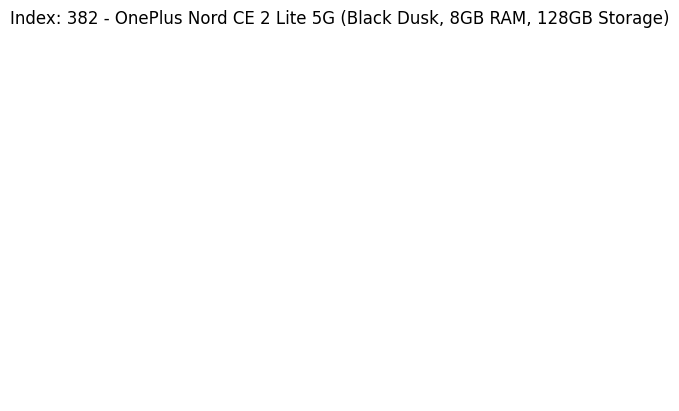

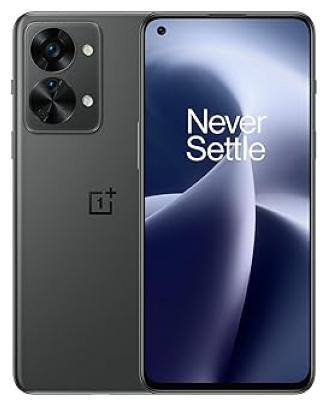

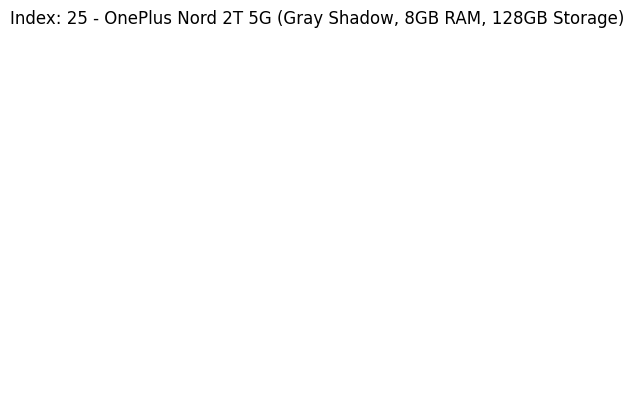

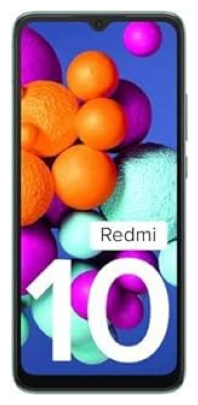

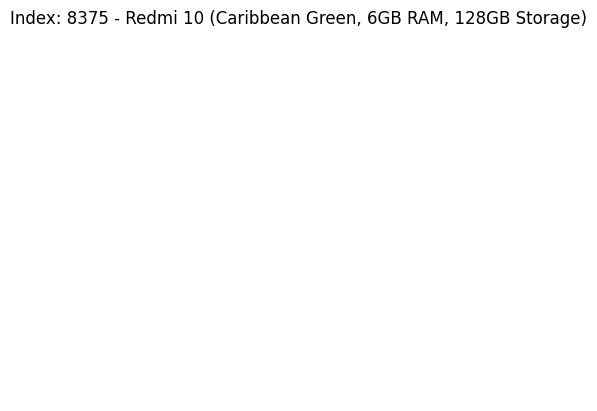

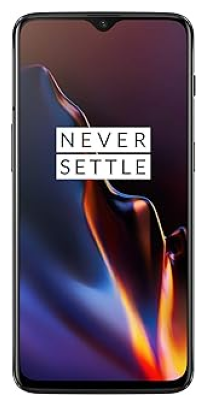

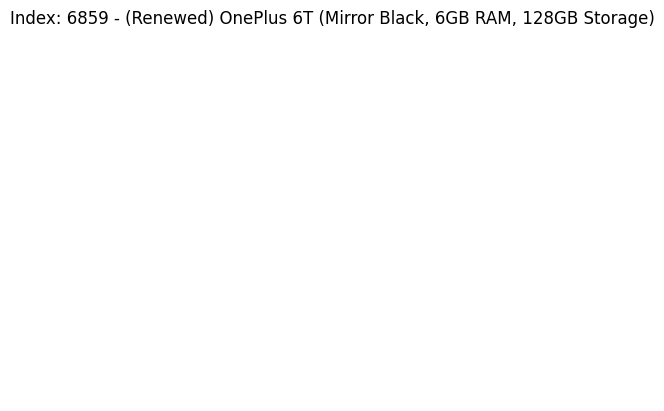

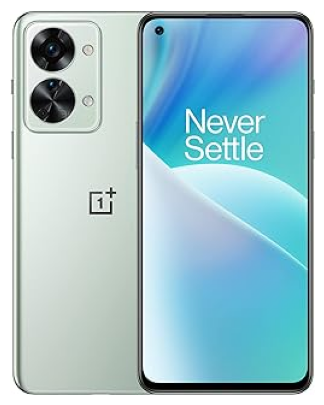

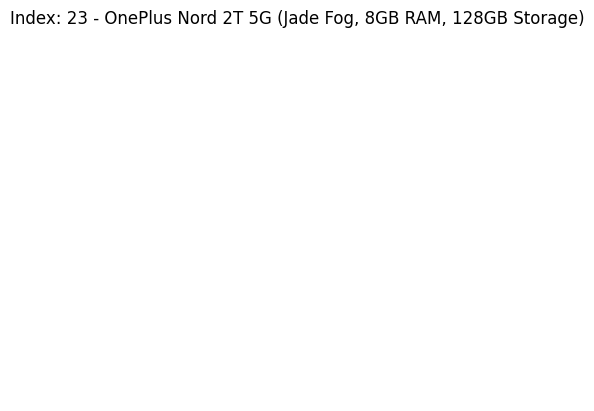

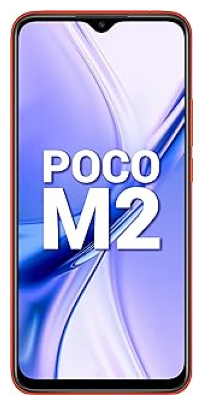

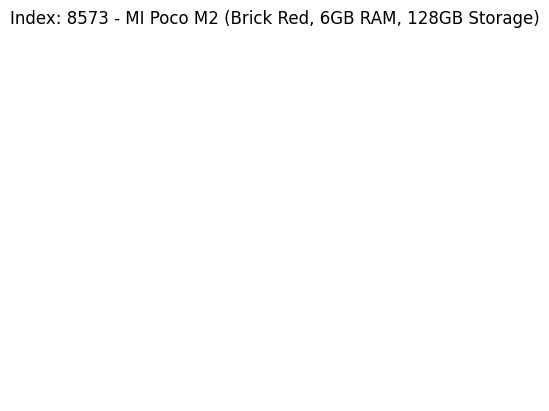

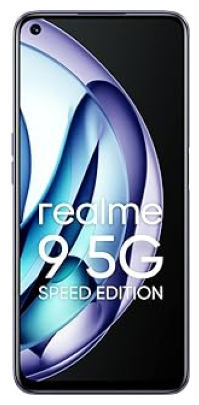

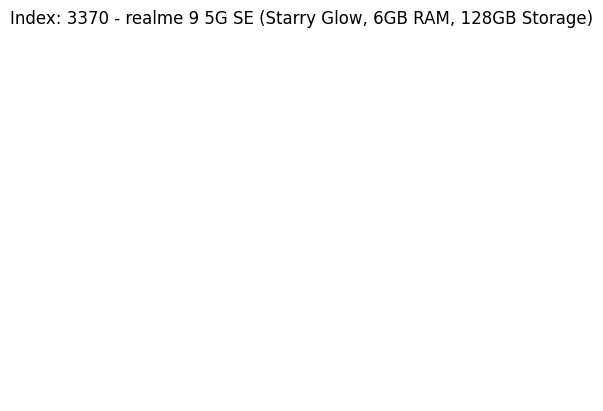

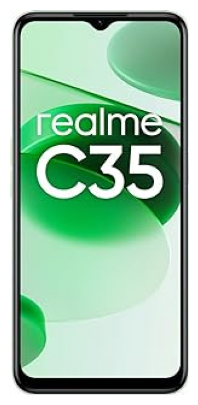

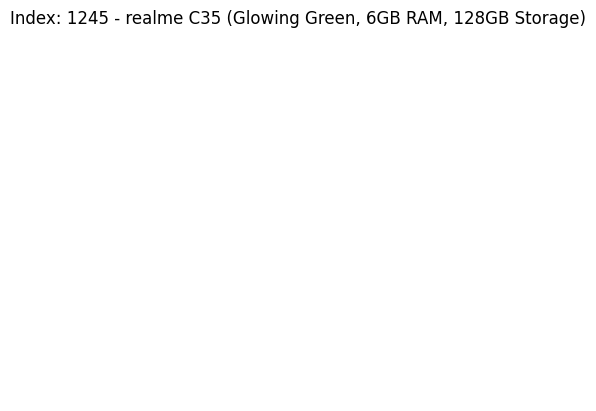

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'euclidean'
compute_similar_rows_multiple(df, concatenated_img_name_bow_data, index_no, num_similar, similarityParam)

***(Name_bow + Image_vec_norm) + Cosine***

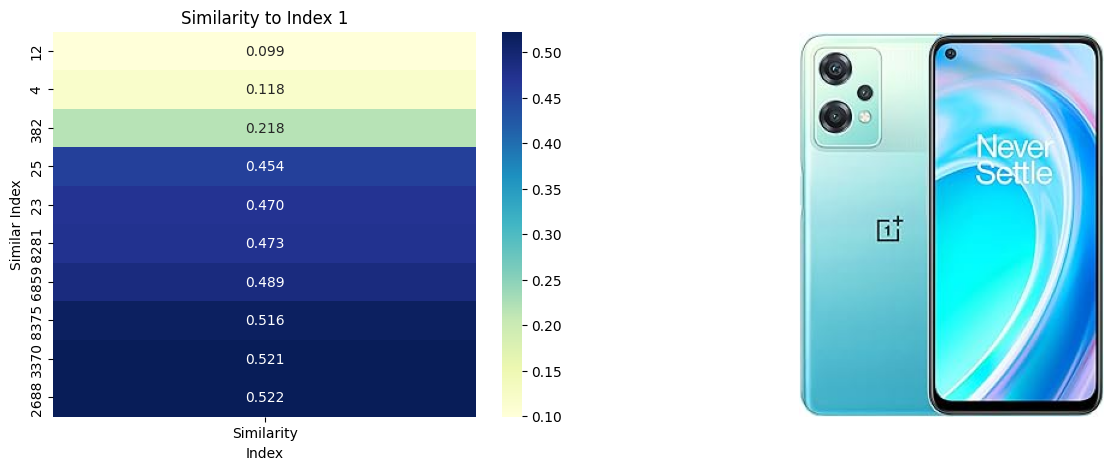

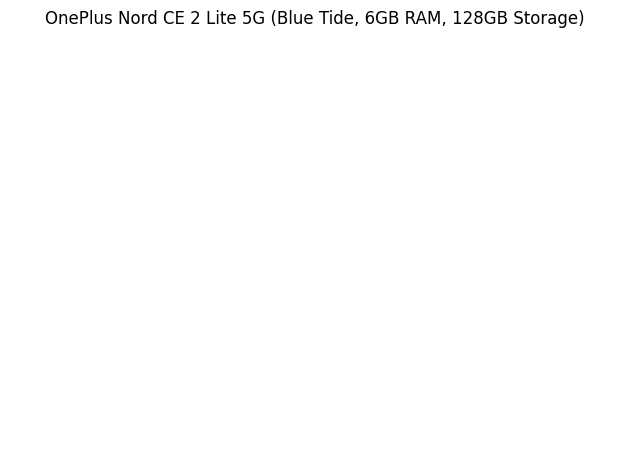

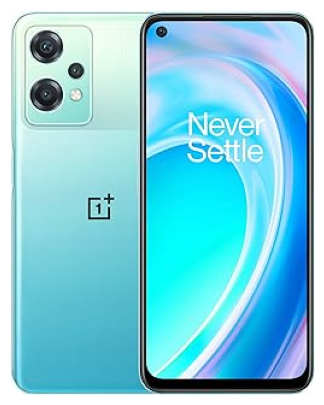

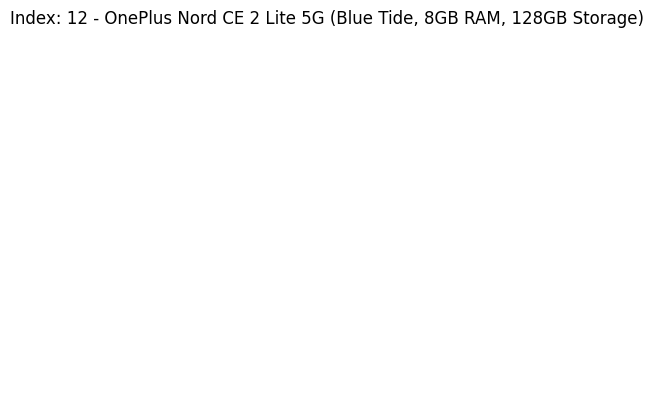

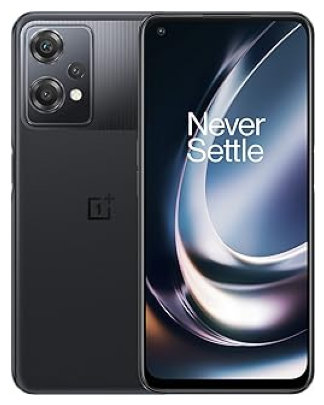

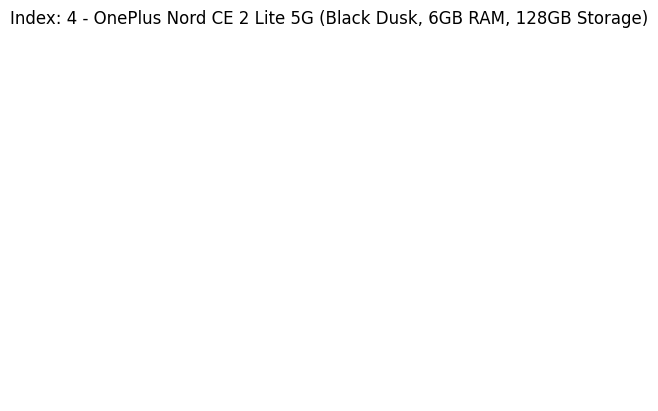

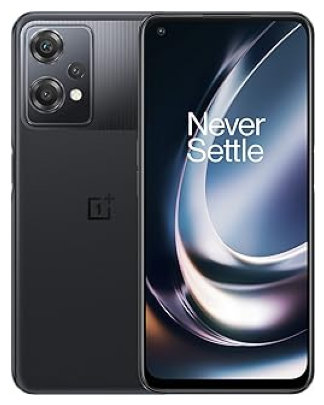

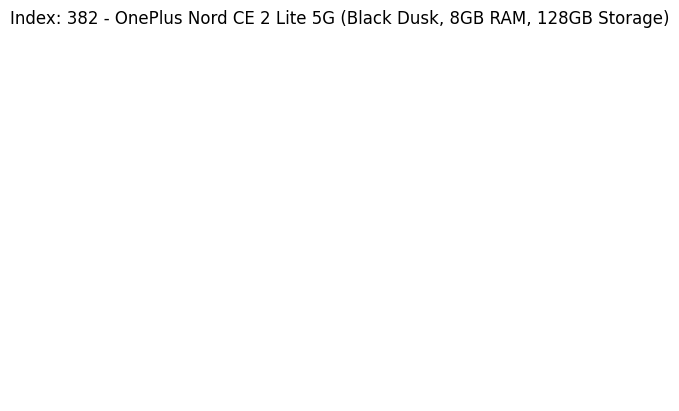

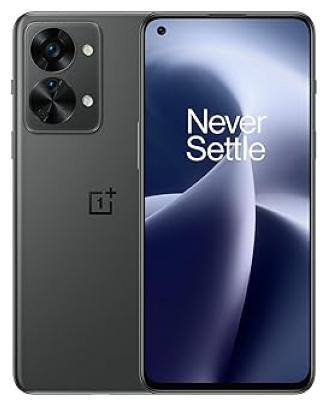

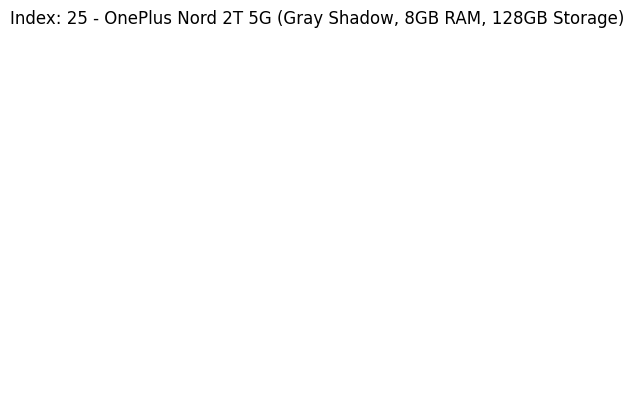

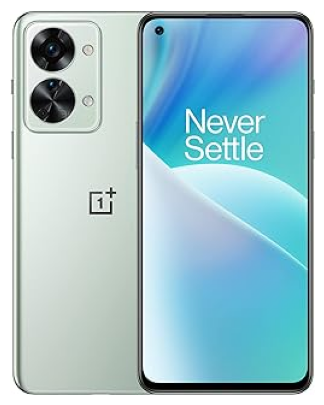

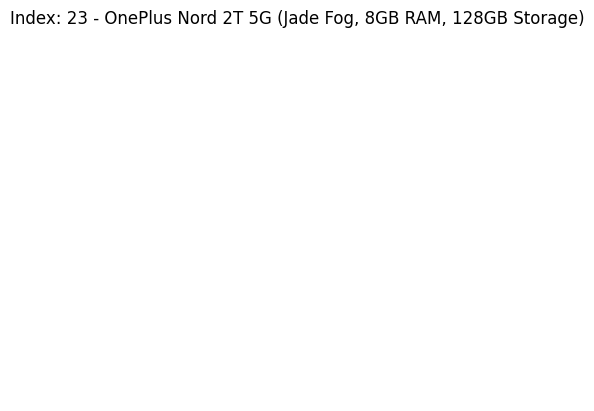

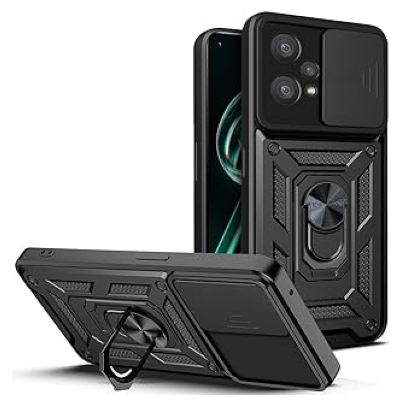

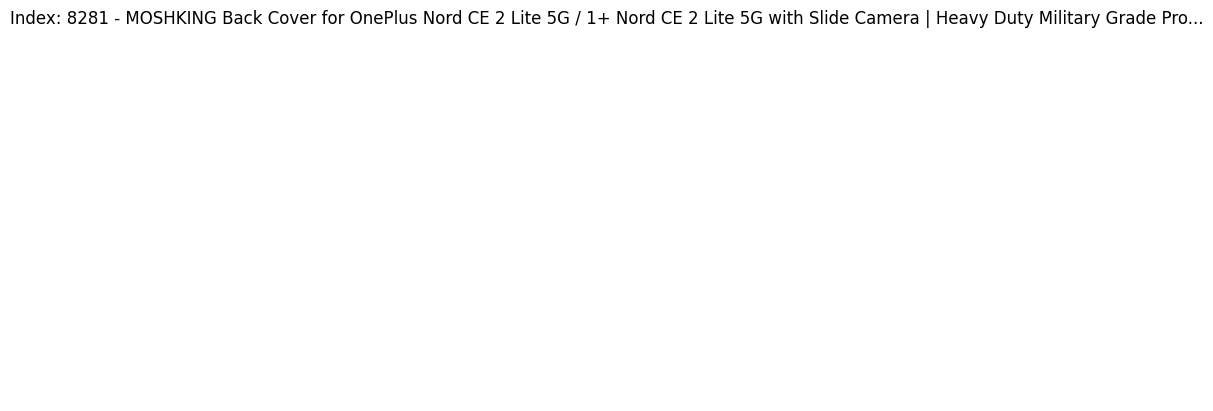

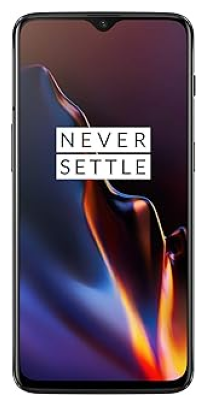

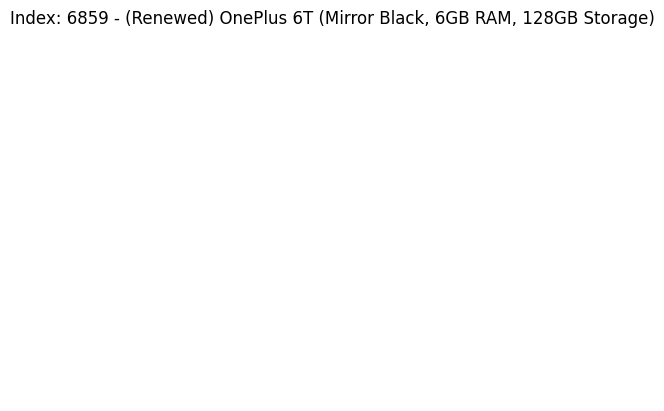

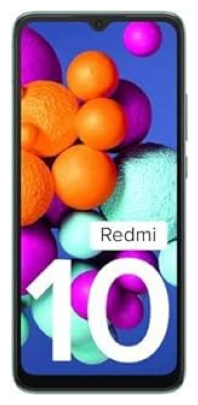

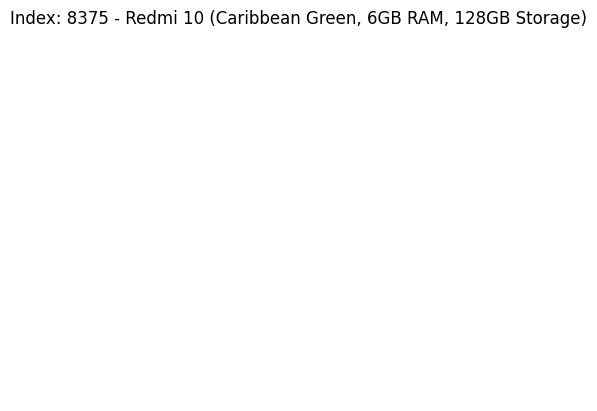

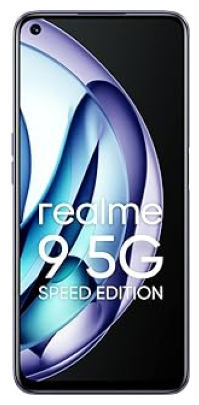

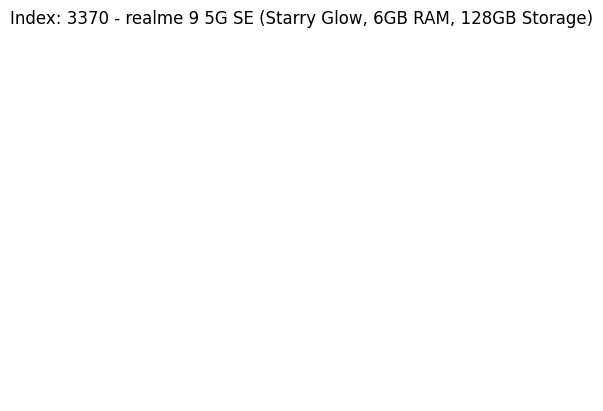

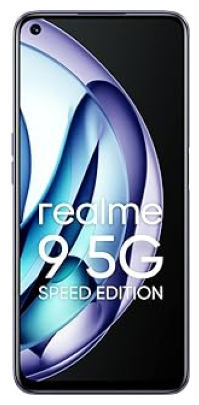

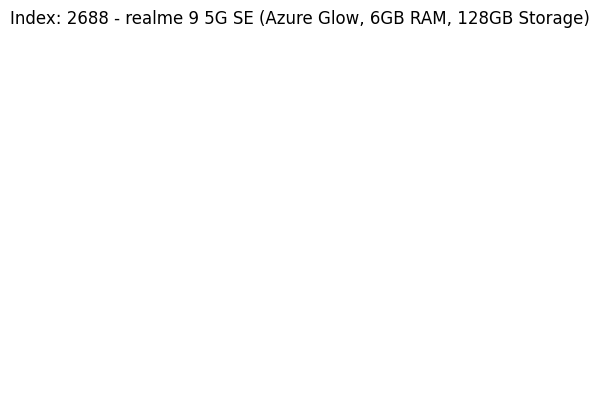

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'cosine'
compute_similar_rows_multiple(df, concatenated_img_name_bow_data, index_no, num_similar, similarityParam)

***(Name + Image + DiscountedPrice + DiscountedPercentage + Ratings) + EuclideanDistance***

In [ ]:
# Reshape 1D arrays to 2D arrays
ratings_2d = np.array(df['ratings']).reshape(-1, 1)
discount_percentage_2d = np.array(df['discount_percentage']).reshape(-1, 1)
discount_price_2d = np.array(df['discount_price']).reshape(-1, 1)

# Concatenate df['name_vec'], df['image_vec'], df['ratings'], df['discount_percentage'], and df['discount_price']
concatenated_n_i_dp_dpg_r_data = np.hstack((np.array(df['name_vec'].tolist()),
                               np.array(df['image_vec'].tolist()),
                               ratings_2d,
                               discount_percentage_2d,
                               discount_price_2d))
concatenated_n_i_dp_dpg_r_data.shape

(2000, 2051)

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'euclidean'
compute_similar_rows_multiple(df, concatenated_n_i_dp_dpg_r_data, index_no, num_similar, similarityParam)

***(Name + Image + DiscountedPrice + DiscountedPercentage + Ratings) + Cosine***

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'cosine'
compute_similar_rows_multiple(df, concatenated_img_name_data, index_no, num_similar, similarityParam)

***(Name + DiscountedPrice + DiscountedPercentage + Ratings) + EuclideanDistance***

In [ ]:
# Reshape 1D arrays to 2D arrays
ratings_2d = np.array(df['ratings']).reshape(-1, 1)
discount_percentage_2d = np.array(df['discount_percentage']).reshape(-1, 1)
discount_price_2d = np.array(df['discount_price']).reshape(-1, 1)

# Concatenate df['name_vec'], df['image_vec'], df['ratings'], df['discount_percentage'], and df['discount_price']
concatenated_n_dp_dpg_r_data = np.hstack((np.array(df['name_vec'].tolist()),
                               ratings_2d,
                               discount_percentage_2d,
                               discount_price_2d))
concatenated_n_dp_dpg_r_data.shape

(2000, 771)

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'euclidean'
compute_similar_rows_multiple(df, concatenated_n_dp_dpg_r_data, index_no, num_similar, similarityParam)

***(Name + DiscountedPrice + DiscountedPercentage + Ratings) + Cosine***

In [ ]:
index_no = 1
num_similar = 10
similarityParam = 'cosine'
compute_similar_rows_multiple(df, concatenated_n_dp_dpg_r_data, index_no, num_similar, similarityParam)

***(Name + DiscountedPrice_norm + DiscountedPercentage + Ratings_norm) + EuclideanDistance***

In [ ]:
# Reshape 1D arrays to 2D arrays
ratings_2d = np.array(df['ratings_norm']).reshape(-1, 1)
discount_percentage_2d = np.array(df['discount_percentage']).reshape(-1, 1)
discount_price_2d = np.array(df['discount_price_norm']).reshape(-1, 1)

# Concatenate df['name_vec'], df['image_vec'], df['ratings'], df['discount_percentage'], and df['discount_price']
concatenated_n_dpn_dp_rn_data = np.hstack((np.array(df['name_vec'].tolist()),
                               ratings_2d,
                               discount_percentage_2d,
                               discount_price_2d))
concatenated_n_dpn_dp_rn_data.shape

(2000, 771)

In [ ]:
index_no = 0
num_similar = 10
similarityParam = 'euclidean'
compute_similar_rows_multiple(df, concatenated_n_dpn_dp_rn_data, index_no, num_similar, similarityParam)

***(Name + DiscountedPrice_norm + DiscountedPercentage + Ratings_norm) + Cosine***

In [ ]:
index_no = 0
num_similar = 10
similarityParam = 'cosine'
compute_similar_rows_multiple(df, concatenated_n_dpn_dp_rn_data, index_no, num_similar, similarityParam)

<h2><b>7. Conclusion</b></h2>

*   In conclusion, this notebook provides a comprehensive overview of building a recommendation system for Amazon products, from data preprocessing and exploratory analysis to model implementation and deployment. By leveraging the techniques and methodologies discussed in this project, e-commerce platforms like Amazon can improve customer satisfaction, drive sales, and stay competitive in the ever-evolving online marketplace.







<h2><b>8. References</b></h2>


*   Kaggle: https://www.kaggle.com/datasets/lokeshparab/amazon-products-dataset
*   Keras-EfficientNetB0-B7: https://keras.io/api/applications/efficientnet/
*   Sent2Vec: https://pypi.org/project/sent2vec/





